In [1]:
from aemulusnu_massfunction.utils import *
from aemulusnu_massfunction.massfunction import *

import numpy as np
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
import os
import emcee
import sys
import numpy as np
import pickle

cosmos_f = open('../data/cosmo_params.pkl', 'rb')
cosmo_params = pickle.load(cosmos_f) #cosmo_params is a dict
cosmos_f.close()

X = []
Y = []
idx = {}
cidx = 0
weird_boxes = []
for box in cosmo_params:
    if(box in weird_boxes):
        continue
    X += [box]
    idx[box] = cidx
    cidx+=1
    Y += [[cosmo_params[box][key] for key in cosmo_params[box]]]
    
X = np.array(X)
Y = np.array(Y)

from aemulusnu_massfunction.utils import Standardizer

# Assuming Y is your input matrix with shape (n_samples, n_features)
# Create an instance of StandardScaler
scaler = Standardizer()

# Fit the scaler to the data
scaler.fit(Y)

# Standardize the data
Y = scaler.transform(Y)

print(len(X))

def find_most_central_datapoint_index(Y):
    centroid = np.mean(Y, axis=0)
    distances = np.linalg.norm(Y - centroid, axis=1)
    most_central_index = np.argmin(distances)
    return most_central_index
print('most central: ', X[find_most_central_datapoint_index(Y)])

def dist(a,b):
    return np.sqrt(np.sum(np.square(np.array(Y[b])-np.array(Y[a]))))

edges = [[dist(i,j) for i in range(len(X))] for j in range(len(X))]


import sys

def find_min_key(key, mst_set, n):
    min_key = sys.maxsize
    min_index = -1
    for i in range(n):
        if key[i] < min_key and not mst_set[i]:
            min_key = key[i]
            min_index = i
    return min_index

def prim_mst(edges, n):
    parent = [None] * n
    key = [sys.maxsize] * n
    mst_set = [False] * n

    key[0] = 0  # Start with the first node as the root
    parent[0] = -1  # Root has no parent

    for _ in range(n - 1):
        u = find_min_key(key, mst_set, n)
        mst_set[u] = True

        for v in range(n):
            if edges[u][v] > 0 and not mst_set[v] and edges[u][v] < key[v]:
                key[v] = edges[u][v]
                parent[v] = u

    mst = [[0] * n for _ in range(n)]
    for i in range(1, n):
        mst[i][parent[i]] = edges[i][parent[i]]
        mst[parent[i]][i] = edges[parent[i]][i]

    return mst

n = len(edges)

mst = prim_mst(edges, n)

from collections import deque

def bfs_traversal(mst, start):
    tot = 0
    n = len(mst)
    visited = [False] * n
    parent = [None] * n

    queue = deque()
    queue.append(start)
    visited[start] = True

    while queue:
        node = queue.popleft()
        print("%-10s"%(X[node]), end='\t ')
        if parent[node] is not None:
            prev = parent[node]
            dist = np.sqrt(np.sum(np.square(np.array(Y[idx[X[node]]])- np.array(Y[idx[X[prev]]]))))
            tot += dist
            curr_params_fname = "/oak/stanford/orgs/kipac/users/delon/aemulusnu_massfunction/%s_%.2f_params.pkl"%(X[node], 1.0) 
            curr_params = None
            with open(curr_params_fname, "rb") as f:
                curr_params = pickle.load(f)
            prev_params_fname = "/oak/stanford/orgs/kipac/users/delon/aemulusnu_massfunction/%s_%.2f_params.pkl"%(X[parent[node]], 1.0) 
            prev_params = None
            with open(prev_params_fname, "rb") as f:
                prev_params = pickle.load(f)
            print("Prev: %-10s\t distance:%.2f"%(X[parent[node]], dist))
            for key in prev_params:
#                 if(np.abs(prev_params[key]-curr_params[key])/curr_params[key] > .1):
                print('\t%s\n\t\tPrev:%.2f\n\t\tCurr:%.2f'%(key,prev_params[key], curr_params[key]))
        print()

        for neighbor in range(n):
            if mst[node][neighbor] > 0 and not visited[neighbor]:
                queue.append(neighbor)
                visited[neighbor] = True
                parent[neighbor] = node
    assert(all(visited))
    print(tot)

start_node = idx['Box_n50_0_1400'] # Starting node for traversal

bfs_traversal(mst, start_node)


150
most central:  Box_n50_0_1400
Box_n50_0_1400	 
Box_n50_14_1400	 Prev: Box_n50_0_1400	 distance:1.03
	d
		Prev:2.11
		Curr:2.11
	e
		Prev:1.00
		Curr:1.00
	f
		Prev:0.53
		Curr:0.53
	g
		Prev:1.24
		Curr:1.23

Box_n50_21_1400	 Prev: Box_n50_0_1400	 distance:1.19
	d
		Prev:2.11
		Curr:2.11
	e
		Prev:1.00
		Curr:1.00
	f
		Prev:0.53
		Curr:0.51
	g
		Prev:1.24
		Curr:1.25

Box_n50_33_1400	 Prev: Box_n50_0_1400	 distance:1.04
	d
		Prev:2.11
		Curr:2.03
	e
		Prev:1.00
		Curr:1.00
	f
		Prev:0.53
		Curr:0.54
	g
		Prev:1.24
		Curr:1.24

Box_n50_35_1400	 Prev: Box_n50_0_1400	 distance:1.01
	d
		Prev:2.11
		Curr:2.06
	e
		Prev:1.00
		Curr:1.00
	f
		Prev:0.53
		Curr:0.54
	g
		Prev:1.24
		Curr:1.24

Box_n50_44_1400	 Prev: Box_n50_0_1400	 distance:1.13
	d
		Prev:2.11
		Curr:2.09
	e
		Prev:1.00
		Curr:1.00
	f
		Prev:0.53
		Curr:0.52
	g
		Prev:1.24
		Curr:1.24

Box3_1400 	 Prev: Box_n50_14_1400	 distance:1.53
	d
		Prev:2.11
		Curr:2.07
	e
		Prev:1.00
		Curr:0.99
	f
		Prev:0.53
		Curr:0.51
	g
		Prev

Box37_1400	 Prev: Box_n50_47_1400	 distance:1.74
	d
		Prev:2.10
		Curr:2.07
	e
		Prev:1.00
		Curr:1.00
	f
		Prev:0.53
		Curr:0.55
	g
		Prev:1.24
		Curr:1.23

Box_n50_13_1400	 Prev: Box_n50_6_1400	 distance:1.20
	d
		Prev:2.04
		Curr:2.04
	e
		Prev:1.00
		Curr:0.99
	f
		Prev:0.54
		Curr:0.53
	g
		Prev:1.23
		Curr:1.23

Box_n50_2_1400	 Prev: Box_n50_22_1400	 distance:1.13
	d
		Prev:2.12
		Curr:2.14
	e
		Prev:0.99
		Curr:1.00
	f
		Prev:0.52
		Curr:0.52
	g
		Prev:1.24
		Curr:1.24

Box_n50_31_1400	 Prev: Box_n50_32_1400	 distance:1.39
	d
		Prev:2.18
		Curr:2.13
	e
		Prev:0.99
		Curr:0.99
	f
		Prev:0.52
		Curr:0.52
	g
		Prev:1.23
		Curr:1.23

Box_n50_39_1400	 Prev: Box_n50_32_1400	 distance:1.19
	d
		Prev:2.18
		Curr:2.11
	e
		Prev:0.99
		Curr:1.00
	f
		Prev:0.52
		Curr:0.54
	g
		Prev:1.23
		Curr:1.23

Box75_1400	 Prev: Box29_1400	 distance:1.77
	d
		Prev:2.11
		Curr:2.02
	e
		Prev:1.01
		Curr:1.00
	f
		Prev:0.54
		Curr:0.55
	g
		Prev:1.24
		Curr:1.23

Box0_1400 	 Prev: Box_n50_11_1400	 dist

Box9_1400 	 Prev: Box_n50_34_1400	 distance:1.17
	d
		Prev:2.03
		Curr:2.01
	e
		Prev:1.00
		Curr:1.01
	f
		Prev:0.52
		Curr:0.53
	g
		Prev:1.25
		Curr:1.25

Box11_1400	 Prev: Box2_1400 	 distance:0.88
	d
		Prev:2.16
		Curr:2.21
	e
		Prev:0.99
		Curr:0.99
	f
		Prev:0.51
		Curr:0.51
	g
		Prev:1.24
		Curr:1.24

Box49_1400	 Prev: Box47_1400	 distance:1.88
	d
		Prev:2.42
		Curr:2.38
	e
		Prev:0.98
		Curr:0.98
	f
		Prev:0.50
		Curr:0.50
	g
		Prev:1.21
		Curr:1.20

Box23_1400	 Prev: Box_n50_41_1400	 distance:1.59
	d
		Prev:2.22
		Curr:2.14
	e
		Prev:0.99
		Curr:1.00
	f
		Prev:0.50
		Curr:0.52
	g
		Prev:1.24
		Curr:1.24

Box85_1400	 Prev: Box21_1400	 distance:1.98
	d
		Prev:2.41
		Curr:2.34
	e
		Prev:0.99
		Curr:0.98
	f
		Prev:0.48
		Curr:0.48
	g
		Prev:1.23
		Curr:1.23

Box83_1400	 Prev: Box34_1400	 distance:1.67
	d
		Prev:2.00
		Curr:1.90
	e
		Prev:0.99
		Curr:0.99
	f
		Prev:0.53
		Curr:0.53
	g
		Prev:1.23
		Curr:1.23

Box68_1400	 Prev: Box_n50_40_1400	 distance:1.87
	d
		Prev:2.18
		Curr:2

In [2]:
a_list_fname = '/oak/stanford/orgs/kipac/users/delon/aemulusnu_massfunction/alist.pkl'
a_list_f = open(a_list_fname, 'rb')
a_list = pickle.load(a_list_f) 
a_list_f.close()

###TEMP
# a_list = [a_list[0], a_list[1]]
#######
print('alist', a_list)

alist [1.0, 0.953321, 0.866399, 0.787402, 0.715608, 0.65036, 0.620002, 0.591061, 0.563471, 0.537169, 0.512095, 0.488191, 0.403224, 0.366459, 0.302679]


 32%|███▏      | 48/150 [00:15<00:26,  3.89it/s]

Box47_1400 0.302679


100%|██████████| 150/150 [00:41<00:00,  3.58it/s]


(1.2, 1.3)

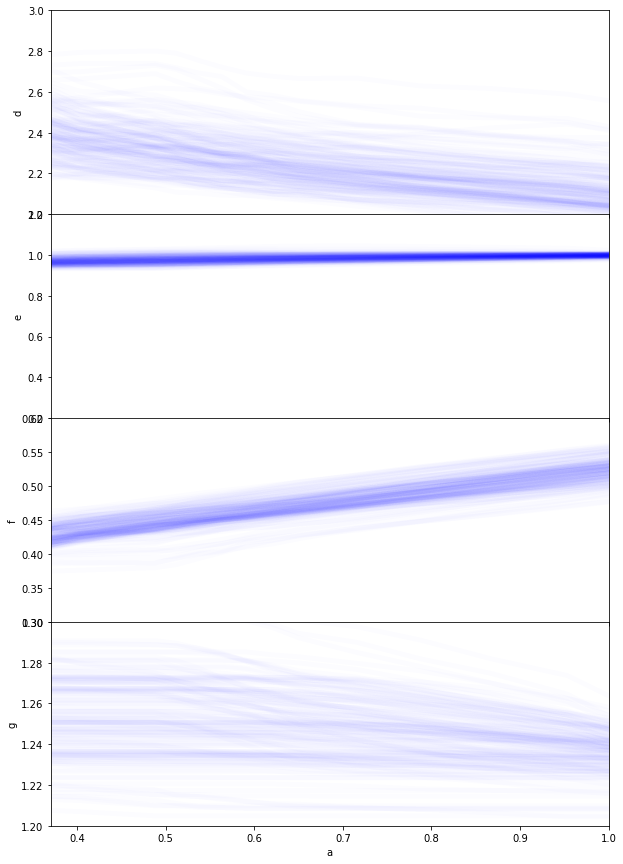

In [3]:
import matplotlib.pyplot as plt
box = 'Box50_1400'
box = 'Box0_1400'
# box = 'Box78_1400'
# box = 'Box_n50_13_1400'
# box = 'Box_n50_0_1400'
param_names = ['d','e','f','g']
ndim = len(param_names)
fig, axs = plt.subplots(ncols=1, nrows=4, figsize=(10,15), sharex=True)
plt.subplots_adjust(wspace=0, hspace=0)


meta_box = [[], [], [], []]
for box in tqdm(cosmo_params):
    TTTTT = False
    if(box in weird_boxes):
        continue
    params = {'d':[], 'e':[], 'f':[], 'g':[]}
    for a in a_list:
        try:
            with open("/oak/stanford/orgs/kipac/users/delon/aemulusnu_massfunction/%s_%.2f_params.pkl"%(box, a), "rb") as f:
                MLE_params = pickle.load(f)
            for i, key in enumerate(MLE_params):
                params[key] += [MLE_params[key]]
                meta_box[i] += [MLE_params[key]]
        except:
            TTTTT = True
            print(box, a)

    for i, param in enumerate(params):
#         axs[i].scatter(a_list, params[param])
        if(not TTTTT):
            axs[i].plot(a_list, params[param], alpha=0.01, lw=5, color='blue')
        else:
            axs[i].plot(a_list[:-1], params[param], alpha=0.01, lw=5, color='blue')

        axs[i].set_ylabel(param)
        axs[i].set_ylim([0,2])
        axs[i].set_xlim([0.37, 1])

    axs[-1].set_xlabel('a')
axs[0].set_ylim([2., 3.])
axs[1].set_ylim([0.2, 1.2])
axs[2].set_ylim([.3,.6])
axs[3].set_ylim([1.2,1.3])


In [4]:
meta_box = np.array(meta_box)
print(meta_box.shape)

(4, 2249)


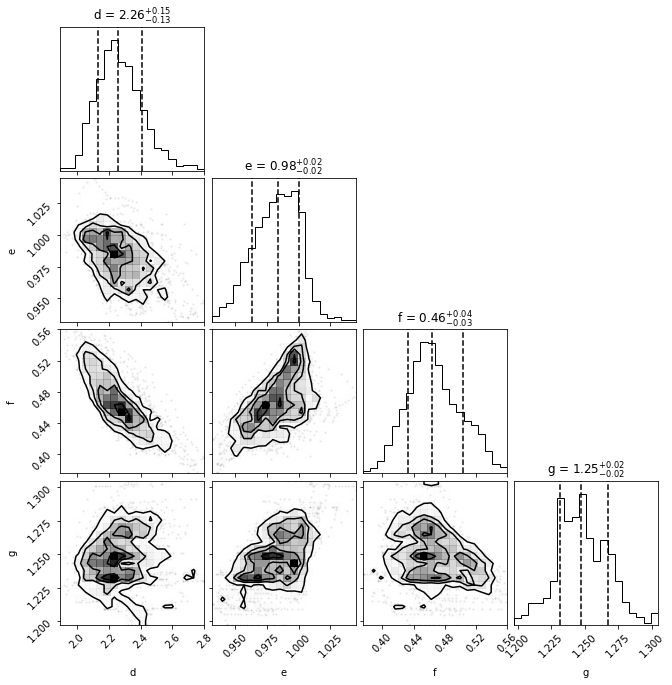

In [5]:
import corner
import numpy as np

figure = corner.corner(meta_box.T,
                      labels=param_names, 
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, return_kwargs={"axes": True})

(1.0, 1.5)

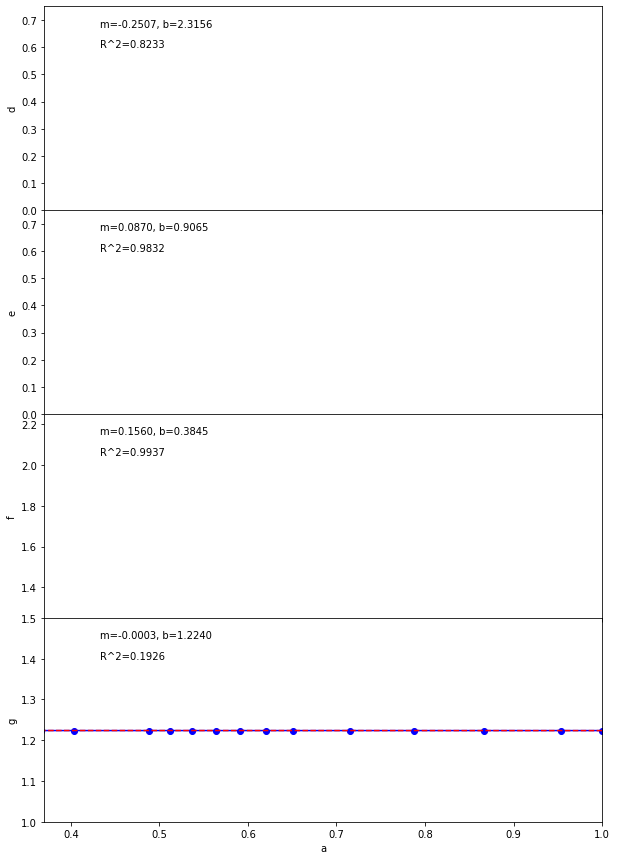

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.metrics import r2_score

box = 'Box_n50_0_1400'
box = 'Box_n50_42_1400'
# Function to fit a line and plot it
def fit_and_plot_line(ax, x, y):
    """
    Fit a line to the data and plot it on the given axis
    """
    coefficients = np.polyfit(x, y, 1)  # Fit a 1st degree polynomial (line)
    m, b = coefficients  # slope and intercept

    # Create a line using the fitted parameters
    y_fit = m * np.array(x) + b

    ax.plot(x, y_fit, color='red', linestyle='--')  # Plot the fitted line

    r2 = r2_score(y, y_fit)
    ax.text(0.1, 0.8, f'R^2={r2:.4f}', transform=ax.transAxes)

    # Display the slope and intercept on the plot
    ax.text(0.1, 0.9, f'm={m:.4f}, b={b:.4f}', transform=ax.transAxes)

# Prepare the plot
param_names = ['d', 'e', 'f', 'g']
ndim = len(param_names)
fig, axs = plt.subplots(ncols=1, nrows=4, figsize=(10, 15), sharex=True)
plt.subplots_adjust(wspace=0, hspace=0)

# Initialize dictionary to store parameters
params = {'d':[], 'e':[], 'f':[], 'g':[]}
for a in a_list:
    with open("/oak/stanford/orgs/kipac/users/delon/aemulusnu_massfunction/%s_%.2f_params.pkl"%(box, a), "rb") as f:
        MLE_params = pickle.load(f)
    for key in MLE_params:
        params[key] += [MLE_params[key]]

# Plot the data and fit lines
for i, param in enumerate(params):
    axs[i].scatter(a_list, params[param], alpha=1, color='blue')

    axs[i].plot(a_list, params[param], alpha=1, color='blue')
    fit_and_plot_line(axs[i], a_list, params[param])  # Fit and plot the line

    axs[i].set_ylabel(param)
    axs[i].set_ylim([0, 2])
    axs[i].set_xlim([0.37, 1])

# Set custom y-limits and x-labels
axs[-1].set_xlabel('a')
axs[0].set_ylim([0, 0.75])
axs[1].set_ylim([0, 0.75])
axs[2].set_ylim([1.25, 2.25])
axs[3].set_ylim([1, 1.5])

In [7]:
# import matplotlib.pyplot as plt
# import numpy as np
# import pickle
# from sklearn.metrics import r2_score
# box = 'Box_n50_0_1400'
# # Function to fit a line and plot it
# def fit_and_plot_line(ax, x, y):
#     """
#     Fit a line to the data and plot it on the given axis
#     """
#     coefficients = np.polyfit(x, y, 1)  # Fit a 1st degree polynomial (line)
#     m, b = coefficients  # slope and intercept

#     # Create a line using the fitted parameters
#     y_fit = m * np.array(x) + b

#     ax.plot(x, y_fit, color='red', linestyle='--')  # Plot the fitted line
#     r2 = r2_score(y, y_fit)
#     ax.text(0.1, 0.8, f'R^2={r2:.4f}', transform=ax.transAxes)
#     # Display the slope and intercept on the plot
#     ax.text(0.1, 0.9, f'm={m:.4f}, b={b:.4f}', transform=ax.transAxes)

# # Prepare the plot
# param_names = ['d', 'e', 'f', 'g']
# ndim = len(param_names)
# fig, axs = plt.subplots(ncols=1, nrows=4, figsize=(10, 15), sharex=True)
# plt.subplots_adjust(wspace=0, hspace=0)

# # Pulled from log files
# params = {'d':[0.431,0.422,0.405,0.384,0.366,0.353,0.344,0.332,0.314,0.303,0.303,0.293,0.276,0.227], 
#           'e':[.3,   0.283,0.257,0.198,0.166,0.154,0.136,0.113,0.077,0.062,0.066,0.055,0.047,0.008], 
#           'f':[1.666,1.672,1.688,1.734,1.742,1.743,1.749,1.761,1.776,1.777,1.771,1.773,1.784,1.813], 
#           'g':[1.195,1.199,1.204,1.222,1.222,1.218,1.218,1.219,1.225,1.225,1.221,1.219,1.208,1.213]}

# # Plot the data and fit lines
# for i, param in enumerate(params):
#     axs[i].plot(a_list, params[param], alpha=1, color='blue')
#     fit_and_plot_line(axs[i], a_list, params[param])  # Fit and plot the line

#     axs[i].set_ylabel(param)
#     axs[i].set_ylim([0, 2])
#     axs[i].set_xlim([0.37, 1])

# # Set custom y-limits and x-labels
# axs[-1].set_xlabel('a')
# axs[0].set_ylim([0, 0.75])
# axs[1].set_ylim([0, 0.75])
# axs[2].set_ylim([1.25, 2.25])
# axs[3].set_ylim([1, 1.5])